In [3]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import pyproj

proj = ccrs.PlateCarree(central_longitude=180)
trans = ccrs.PlateCarree()

LONLOCATOR = MultipleLocator(30)
LATLOCATOR = MultipleLocator(10)

In [9]:
SOURCEDIR = r"X:\georisk\HaRIA_B_Wind\data\raw\from_toa"
columns = ['Datetime', 'milliseconds', 'Latitude', 'Longitude', 'Altitude', 'Amplitude', 'CG']

Load the data and convert to a `GeoDataFrame`

In [41]:
SOURCEDIR = r"X:\georisk\HaRIA_B_Wind\data\raw\from_toa"
columns = ['Datetime', 'milliseconds', 'Latitude', 'Longitude', 'Altitude', 'Amplitude', 'CG']
df= pd.read_csv(os.path.join(SOURCEDIR, "Geoscience 2015.csv"),
                header=0,
                names=columns,
                usecols=[0, 1, 2, 3, 4, 5, 6],
                parse_dates=[0],
                date_format="%Y-%m-%d %H:%M:%SZ")
gdf = gpd.GeoDataFrame(data=df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326')

Make a basic plot of the data to show we can work with it

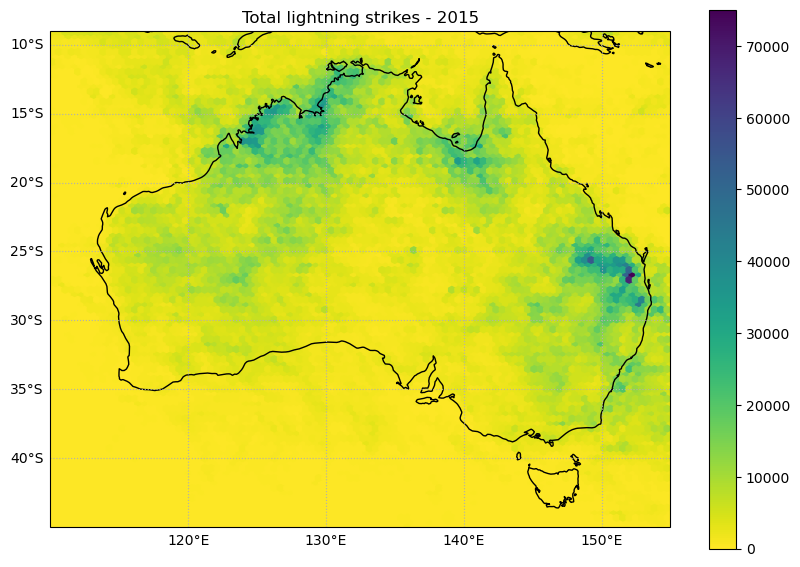

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7), subplot_kw={'projection':trans})
gdf.plot(ax=ax, kind='hexbin', x='Longitude', y='Latitude', colormap='viridis_r')
ax.coastlines()
gl = ax.gridlines(draw_labels=True, linestyle=':')
gl.top_labels=False
gl.right_labels=False
ax.set_title("Total lightning strikes - 2015")
ax.set_extent((110, 155, -45, -9), crs=trans)